# Confronto tra algoritmi di ordinamento 
## Analisi tra Selection Sort e QuickSort
##### Andrea Pistelli, matricola: 7049769

### Introduzione
Gli algoritmi di ordinamento vengono utilizzati per organizzare una sequenza di elementi in un ordine specifico, solitamente crescente o decrescente. Esistono vari tipi di algoritmi di ordinamento che si differenziano per complessità computazionale, stabilità e tipo di dati che possono gestire. In questo notebook, verranno confrontati due algoritmi di ordinamento: Selection Sort e QuickSort.

In [101]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

## Selection Sort

**Descrizione:**
Selection Sort è un algoritmo di ordinamento semplice. Funziona selezionando ripetutamente l'elemento minimo (o massimo) dalla parte non ordinata della lista e scambiandolo con il primo elemento non ordinato. Questo processo viene ripetuto fino a quando l'intera lista è ordinata.

**Passi da seguire:**
1. Trova l'elemento minimo nella lista non ordinata.
2. Scambia l'elemento minimo con il primo elemento della lista non ordinata.
3. Sposta il confine tra la lista ordinata e quella non ordinata di una posizione a destra.
4. Ripeti i passi 1-3 fino a quando l'intera lista è ordinata.

**Analisi delle prestazioni:**
- **Complessità temporale:** $\(\Theta (n^2)\)$ sia nel caso peggiore, che medio che migliore
- **Complessità spaziale:** $\(\Theta (1)\)$ (in-place)

Selection Sort è inefficiente per grandi dataset a causa della sua complessità temporale quadratica, ma può essere utile per dataset piccoli o quando la memoria è limitata.

In [102]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

In [103]:
# Esempio di utilizzo di Selection Sort 
arr = [64, 25, 12, 22, 11, 1, 90, 100, 3, 5]
selection_sort(arr)
print("Lista ordinata:", arr)

Lista ordinata: [1, 3, 5, 11, 12, 22, 25, 64, 90, 100]


## QuickSort

**Descrizione:**
QuickSort è un algoritmo di ordinamento efficiente e ampiamente utilizzato. Utilizza un approccio divide-et-impera, scegliendo un elemento pivot e partizionando l'array in modo che gli elementi minori del pivot siano a sinistra e quelli maggiori a destra. Successivamente, ordina ricorsivamente le due parti.

**Passi da seguire:**
1. Scegli un elemento pivot dall'array.
2. Partiziona l'array in modo che tutti gli elementi minori del pivot siano a sinistra e quelli maggiori a destra.
3. Ordina ricorsivamente le due partizioni.

**Analisi delle prestazioni:**
- **Complessità temporale:**
  - Caso peggiore: $\(\Theta (n^2)\)$
  - Caso medio: $\(\Theta (n \log n)\)$
  - Caso migliore: $\(\Theta (n \log n)\)$
- **Complessità spaziale:** $\(\Theta (\log n)\)$ (a causa della ricorsione)

QuickSort è generalmente più efficiente di altri algoritmi di ordinamento per grandi dataset, ma la sua efficienza dipende dalla scelta del pivot.

Se **randomizziamo** la scelta del pivot possiamo avere complessità temporale stabile $\(\Theta (n \log n)\)$ anche nel caso peggiore.

In [104]:
def randomized_partition(arr, low, high):
    pivot_index = random.randint(low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    return partition(arr, low, high)

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def randomized_quicksort(arr, low, high):
    if low < high:
        pi = randomized_partition(arr, low, high)
        randomized_quicksort(arr, low, pi - 1)
        randomized_quicksort(arr, pi + 1, high)

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

In [105]:
# Esempio di utilizzo di QuickSort  
arr = [64, 25, 12, 22, 11, 1, 90, 100, 3, 5]
randomized_quicksort(arr, 0, len(arr) - 1)
print("Lista ordinata:", arr)

Lista ordinata: [1, 3, 5, 11, 12, 22, 25, 64, 90, 100]


## Descrizione di Test di Prestazioni

Per confrontare le prestazioni di Selection Sort e QuickSort, verranno eseguiti test su array generati casualmente di dimensioni crescenti. Verranno misurati i tempi di esecuzione per ciascun algoritmo e verrà confrontata la loro efficienza al variare delle dimensioni dell'array.

Utilizziamo la seguente funzione per calcolare le prestazioni degli algoritmi:

In [106]:
def performance_test(array):
    arr_quicksort = array.copy()
    
    # Calcolo del tempo di esecuzione per Selection Sort
    start_time = time.perf_counter()
    selection_sort(array)
    end_time = time.perf_counter()
    selection_time = end_time - start_time
    
    # Calcolo del tempo di esecuzione per QuickSort
    start_time = time.perf_counter()
    randomized_quicksort(arr_quicksort, 0, len(array) - 1)
    end_time = time.perf_counter()
    quicksort_time = end_time - start_time
    
    return selection_time, quicksort_time

### Test di Prestazioni
eseguiamo ora i test sugli array casuali di dimensioni: 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000.

In [107]:
sizes = [5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
selection_times = []
quicksort_times = []

In [108]:
for size in sizes:
    array = [random.randint(0, 10000) for _ in range(size)] # generazione array casuale di dimensione scelta con valori da 0 a 10000
    selection_time, quicksort_time = performance_test(array)
    selection_times.append(selection_time)
    quicksort_times.append(quicksort_time)
    print(f"Dimensione array: {size}, Selection Sort: {selection_time:.6f} sec, QuickSort: {quicksort_time:.6f} sec")

Dimensione array: 5, Selection Sort: 0.000006 sec, QuickSort: 0.000009 sec
Dimensione array: 10, Selection Sort: 0.000003 sec, QuickSort: 0.000006 sec
Dimensione array: 50, Selection Sort: 0.000032 sec, QuickSort: 0.000033 sec
Dimensione array: 100, Selection Sort: 0.000110 sec, QuickSort: 0.000059 sec
Dimensione array: 500, Selection Sort: 0.003054 sec, QuickSort: 0.001162 sec
Dimensione array: 1000, Selection Sort: 0.012861 sec, QuickSort: 0.000950 sec
Dimensione array: 5000, Selection Sort: 0.345073 sec, QuickSort: 0.005618 sec
Dimensione array: 10000, Selection Sort: 1.781900 sec, QuickSort: 0.011632 sec
Dimensione array: 50000, Selection Sort: 37.104803 sec, QuickSort: 0.078222 sec


### Grafico delle Prestazioni

Visualizziamo i risultati dei test in un grafico.

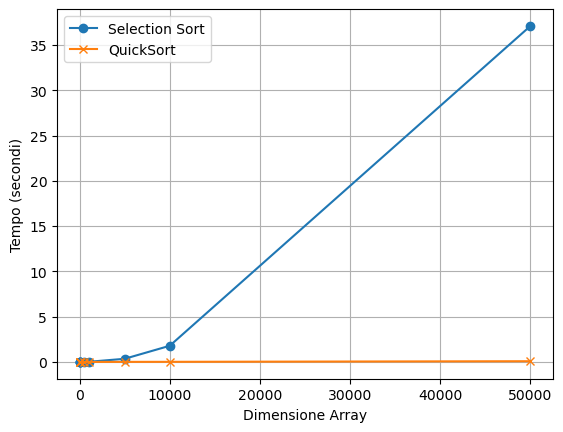

In [109]:
plt.plot(sizes, selection_times, label='Selection Sort', marker='o')
plt.plot(sizes, quicksort_times, label='QuickSort', marker='x')

plt.xlabel('Dimensione Array')
plt.ylabel('Tempo (secondi)')
plt.legend()
plt.grid(True)

plt.show()

Visualizziamo anche un grafico con una scala logaritmica che possa evidenziare meglio le differenze tra i due algoritmi a seconda della dimensione dell'array.

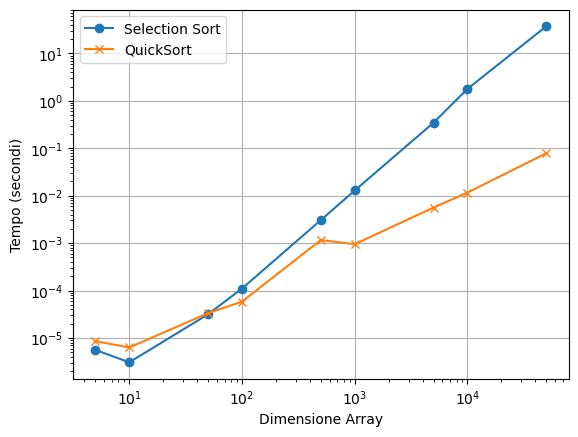

In [110]:
plt.plot(sizes, selection_times, label='Selection Sort', marker='o')
plt.plot(sizes, quicksort_times, label='QuickSort', marker='x')

plt.xlabel('Dimensione Array')
plt.ylabel('Tempo (secondi)')
plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

### Evidenziare il tipo di andamento
Per evidenziare meglio il tipo di andamento dei due algoritmi, possiamo utilizzare un altro tipo di grafico:
allochiamo un array casuale di dimensioni progressivamente più grandi che ordiniamo nei due modi, i punti del grafico tuttavia li calcoliamo con la formula $y_n = (end_n - start_n)/n + y_{n-1}$

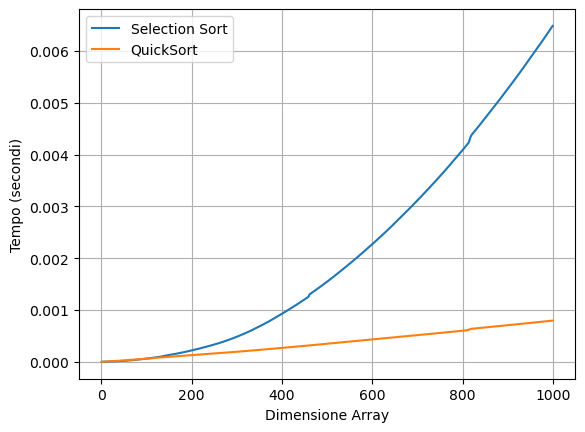

In [111]:
x, s, q = [], [], []
for i in range(1, 1000):
    x.append(i)
    array = random.sample(range(i), i)
    arr_quicksort = array.copy()
    
    start = time.perf_counter()
    selection_sort(array)
    end = time.perf_counter()
    z = s[-1] if (len(s) != 0) else 0
    s.append((end - start) / i + z)
    
    start = time.perf_counter()
    randomized_quicksort(arr_quicksort, 0, i - 1)
    end = time.perf_counter()
    z = q[-1] if (len(q) != 0) else 0
    q.append((end - start) / i + z)

plt.plot(x, s, label='Selection Sort')
plt.plot(x, q, label='QuickSort')

plt.xlabel('Dimensione Array')
plt.ylabel('Tempo (secondi)')
plt.legend()
plt.grid(True)

plt.show()

## Caso Array ordinato
esaminiamo ora il caso specifico dove l'array è già ordinato in modo crescente e analizziamo se le presentation degli algoritmi cambiano.

Valutiamo anche l'algoritmo di Quicksort originale non randomizzato per evidenziare come la randomizzazione aiuti alle prestazioni.

In [112]:
sizes = [5, 10, 50, 100, 250,  500, 750, 1000, 1250, 1500, 1750, 2000]
selection_times = []
quicksort_times = []
original_quicksort_times = []

In [113]:
for size in sizes:
    array = np.arange(size) # array ordinato in modo crescente
    selection_time, quicksort_time = performance_test(array)
    
    start_time = time.perf_counter()
    quicksort(array, 0, len(array) - 1)
    end_time = time.perf_counter()
    or_quicksort_time = end_time - start_time
    
    selection_times.append(selection_time)
    quicksort_times.append(quicksort_time)
    original_quicksort_times.append(or_quicksort_time)
    print(f"Dimensione array: {size}, Selection Sort: {selection_time:.6f} sec, QuickSort: {quicksort_time:.6f} sec, Original QuickSort: {or_quicksort_time:.6f} sec")

Dimensione array: 5, Selection Sort: 0.000011 sec, QuickSort: 0.000015 sec, Original QuickSort: 0.000009 sec
Dimensione array: 10, Selection Sort: 0.000012 sec, QuickSort: 0.000015 sec, Original QuickSort: 0.000021 sec
Dimensione array: 50, Selection Sort: 0.000208 sec, QuickSort: 0.000099 sec, Original QuickSort: 0.000423 sec
Dimensione array: 100, Selection Sort: 0.000795 sec, QuickSort: 0.000213 sec, Original QuickSort: 0.001690 sec
Dimensione array: 250, Selection Sort: 0.004773 sec, QuickSort: 0.000894 sec, Original QuickSort: 0.010318 sec
Dimensione array: 500, Selection Sort: 0.019574 sec, QuickSort: 0.001503 sec, Original QuickSort: 0.043954 sec
Dimensione array: 750, Selection Sort: 0.042839 sec, QuickSort: 0.002343 sec, Original QuickSort: 0.099516 sec
Dimensione array: 1000, Selection Sort: 0.079731 sec, QuickSort: 0.003330 sec, Original QuickSort: 0.177724 sec
Dimensione array: 1250, Selection Sort: 0.121435 sec, QuickSort: 0.003999 sec, Original QuickSort: 0.276488 sec
Dim

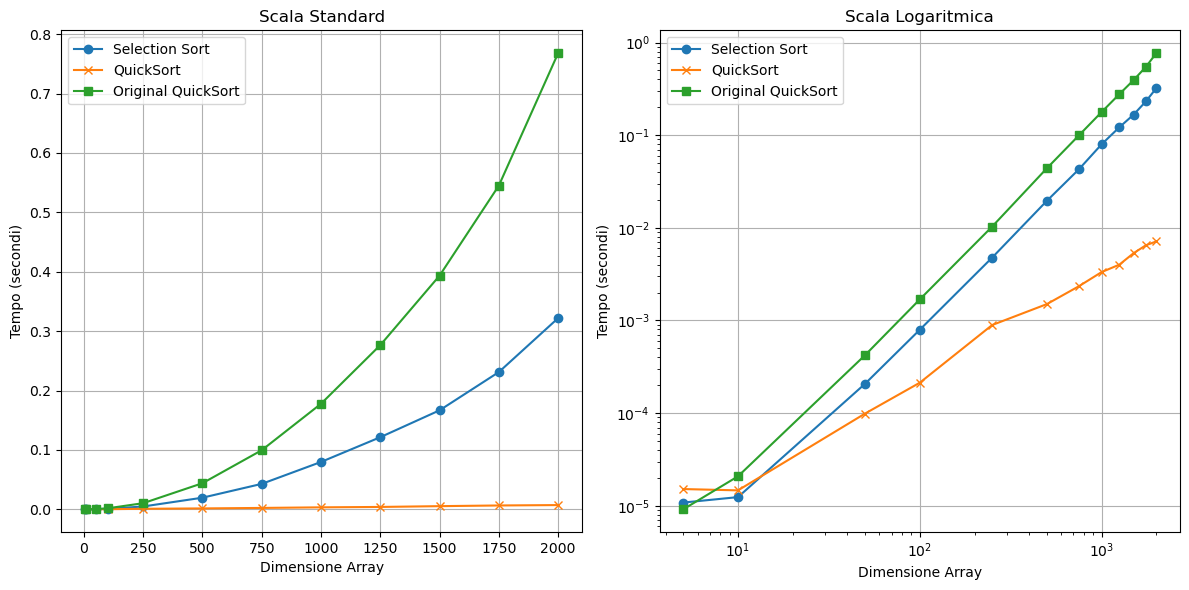

In [114]:
plt.figure(figsize=(12, 6))
# Plot scala normale
plt.subplot(1, 2, 1)
plt.plot(sizes, selection_times, label='Selection Sort', marker='o')
plt.plot(sizes, quicksort_times, label='QuickSort', marker='x')
plt.plot(sizes, original_quicksort_times, label='Original QuickSort', marker='s')
plt.xlabel('Dimensione Array')
plt.ylabel('Tempo (secondi)')
plt.title('Scala Standard')
plt.legend()
plt.grid(True)

# Plot scala logaritmica
plt.subplot(1, 2, 2)
plt.plot(sizes, selection_times, label='Selection Sort', marker='o')
plt.plot(sizes, quicksort_times, label='QuickSort', marker='x')
plt.plot(sizes, original_quicksort_times, label='Original QuickSort', marker='s')
plt.xlabel('Dimensione Array')
plt.ylabel('Tempo (secondi)')
plt.title('Scala Logaritmica')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()